In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px
import warnings
import sys
import datetime

# Suppress warnings for cleaner output
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set a random seed for reproducibility
np.random.seed(42)

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid", palette="muted")


# Loading the data

In [ ]:
def load_data(filepath):
  data = pd.read_csv(filepath,sep='\t')
  print(f"Number of datapoints: {len(data)}")
  print("First five rows of dataset: ")
  display(data.head())
  return data


data = load_data('marketing_campaign.csv')

Number of datapoints: 2240
First five rows of dataset: 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Understanding the dataset

In [ ]:
def explore_dataset(data):
  print("Dataset Information: ")
  data.info()
  print("\nSummary statistics: ")
  display(data.describe())
  print("\nMissing values per feature: ")
  print(data.isnull().sum())

explore_dataset(data)

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchase

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000



Missing values per feature: 
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


# Data Cleaning

## a. Handling Missing Values

In [ ]:
def handle_missing_values(data):
  if data['Income'].isnull().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    data['Income'] = imputer.fit_transform(data[['Income']])
    print("Missing values in 'Income' column have been imputed with the median")

  initial_length = len(data)
  data = data.dropna()
  final_length = len(data)
  print(f"Dropped {initial_length-final_length} rows with remaining missing values")
  return data

data = handle_missing_values(data)

Missing values in 'Income' column have been imputed with the median
Dropped 0 rows with remaining missing values


## b. Parsing Dates

In [ ]:
def parse_dates(data):
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')
  max_date = data['Dt_Customer'].max()
  data['Customer_For'] = (max_date - data['Dt_Customer']).dt.days
  print(f"Newest customer's enrollment date: {max_date.date()}")
  print(f"Oldest customer's enrollment date: {data['Dt_Customer'].min().date()}")
  return data

data = parse_dates(data)

Newest customer's enrollment date: 2014-06-29
Oldest customer's enrollment date: 2012-07-30


## c. Removing Outliers

In [ ]:
def remove_outliers(data):
  initial_length = len(data)
  data["Age"] = 2024-data["Year_Birth"]
  data = data[data['Age']<90]
  data = data[data['Income']<600000]
  final_length = len(data)
  print(f"Dropped {initial_length-final_length} rows with outliers")
  return data

data = remove_outliers(data)

Dropped 4 rows with outliers


# Feature Engineering

In [ ]:
def feature_engineering(data):

  latest_year = data["Dt_Customer"].dt.year.max()
  data["Age"] = latest_year - data["Year_Birth"]

  data["Living_With"] = data["Marital_Status"].replace({
        "Married": "Partner",
        "Together": "Partner",
        "Divorced": "Alone",
        "Single": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Absurd": "Alone"
  })

  data["Children"] = data["Kidhome"] + data["Teenhome"]

  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]

  data["Is_Parent"] = np.where(data["Children"] > 0, 1, 0)

  data["Education"] = data["Education"].replace({
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate"
  })



  data = data.rename(columns={
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold"
  })

  data["Spent"] = data["Wines"] + data["Fruits"] + data["Meat"] + \
                    data["Fish"] + data["Sweets"] + data["Gold"]

  data["Income_per_Child"] = data["Income"] / (data["Children"] + 1)
  data["Spent_per_Family_Size"] = data["Spent"] / data["Family_Size"]

  to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
  data = data.drop(to_drop, axis=1)

  print("Feature engineering completed.")
  return data



data = feature_engineering(data)

Feature engineering completed.


<ipython-input-9-61ace9c129b9>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]


# EDA

Pairwise Plot of selected features: 


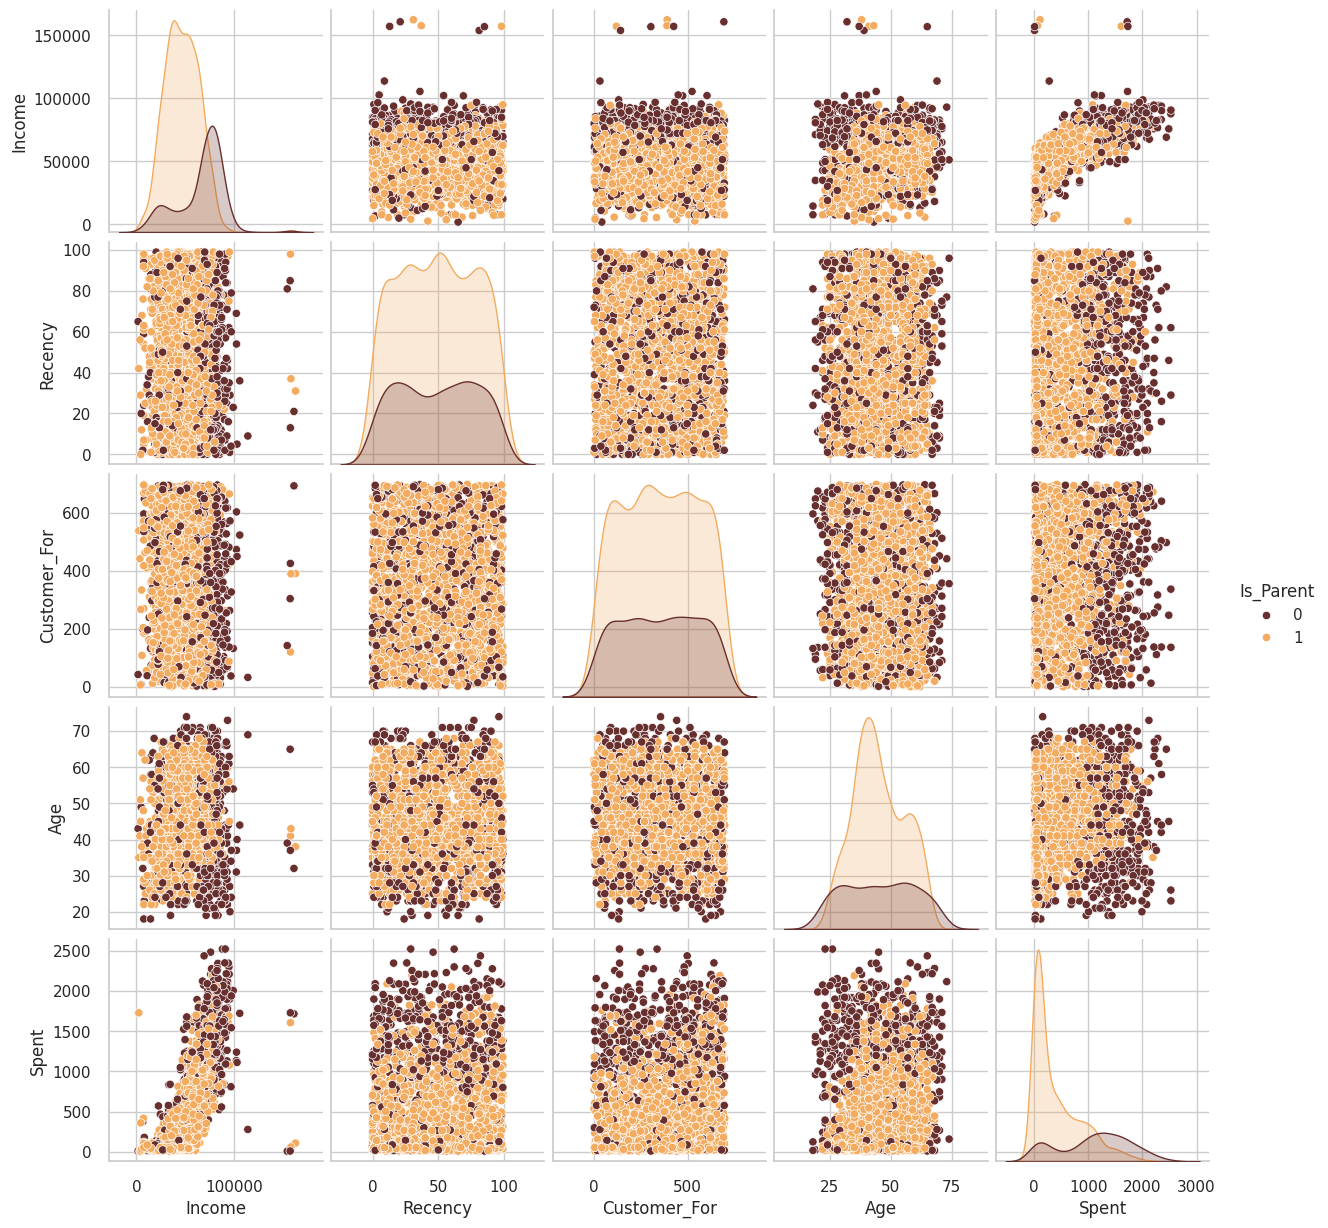

In [ ]:
def initial_visualization(data):
  selected_features = ['Income','Recency','Customer_For','Age','Spent','Is_Parent']
  print("Pairwise Plot of selected features: ")
  sns.pairplot(data[selected_features],hue="Is_Parent",palette=["#682F2F", "#F3AB60"])
  plt.show()

initial_visualization(data)

# Correlation Analysis

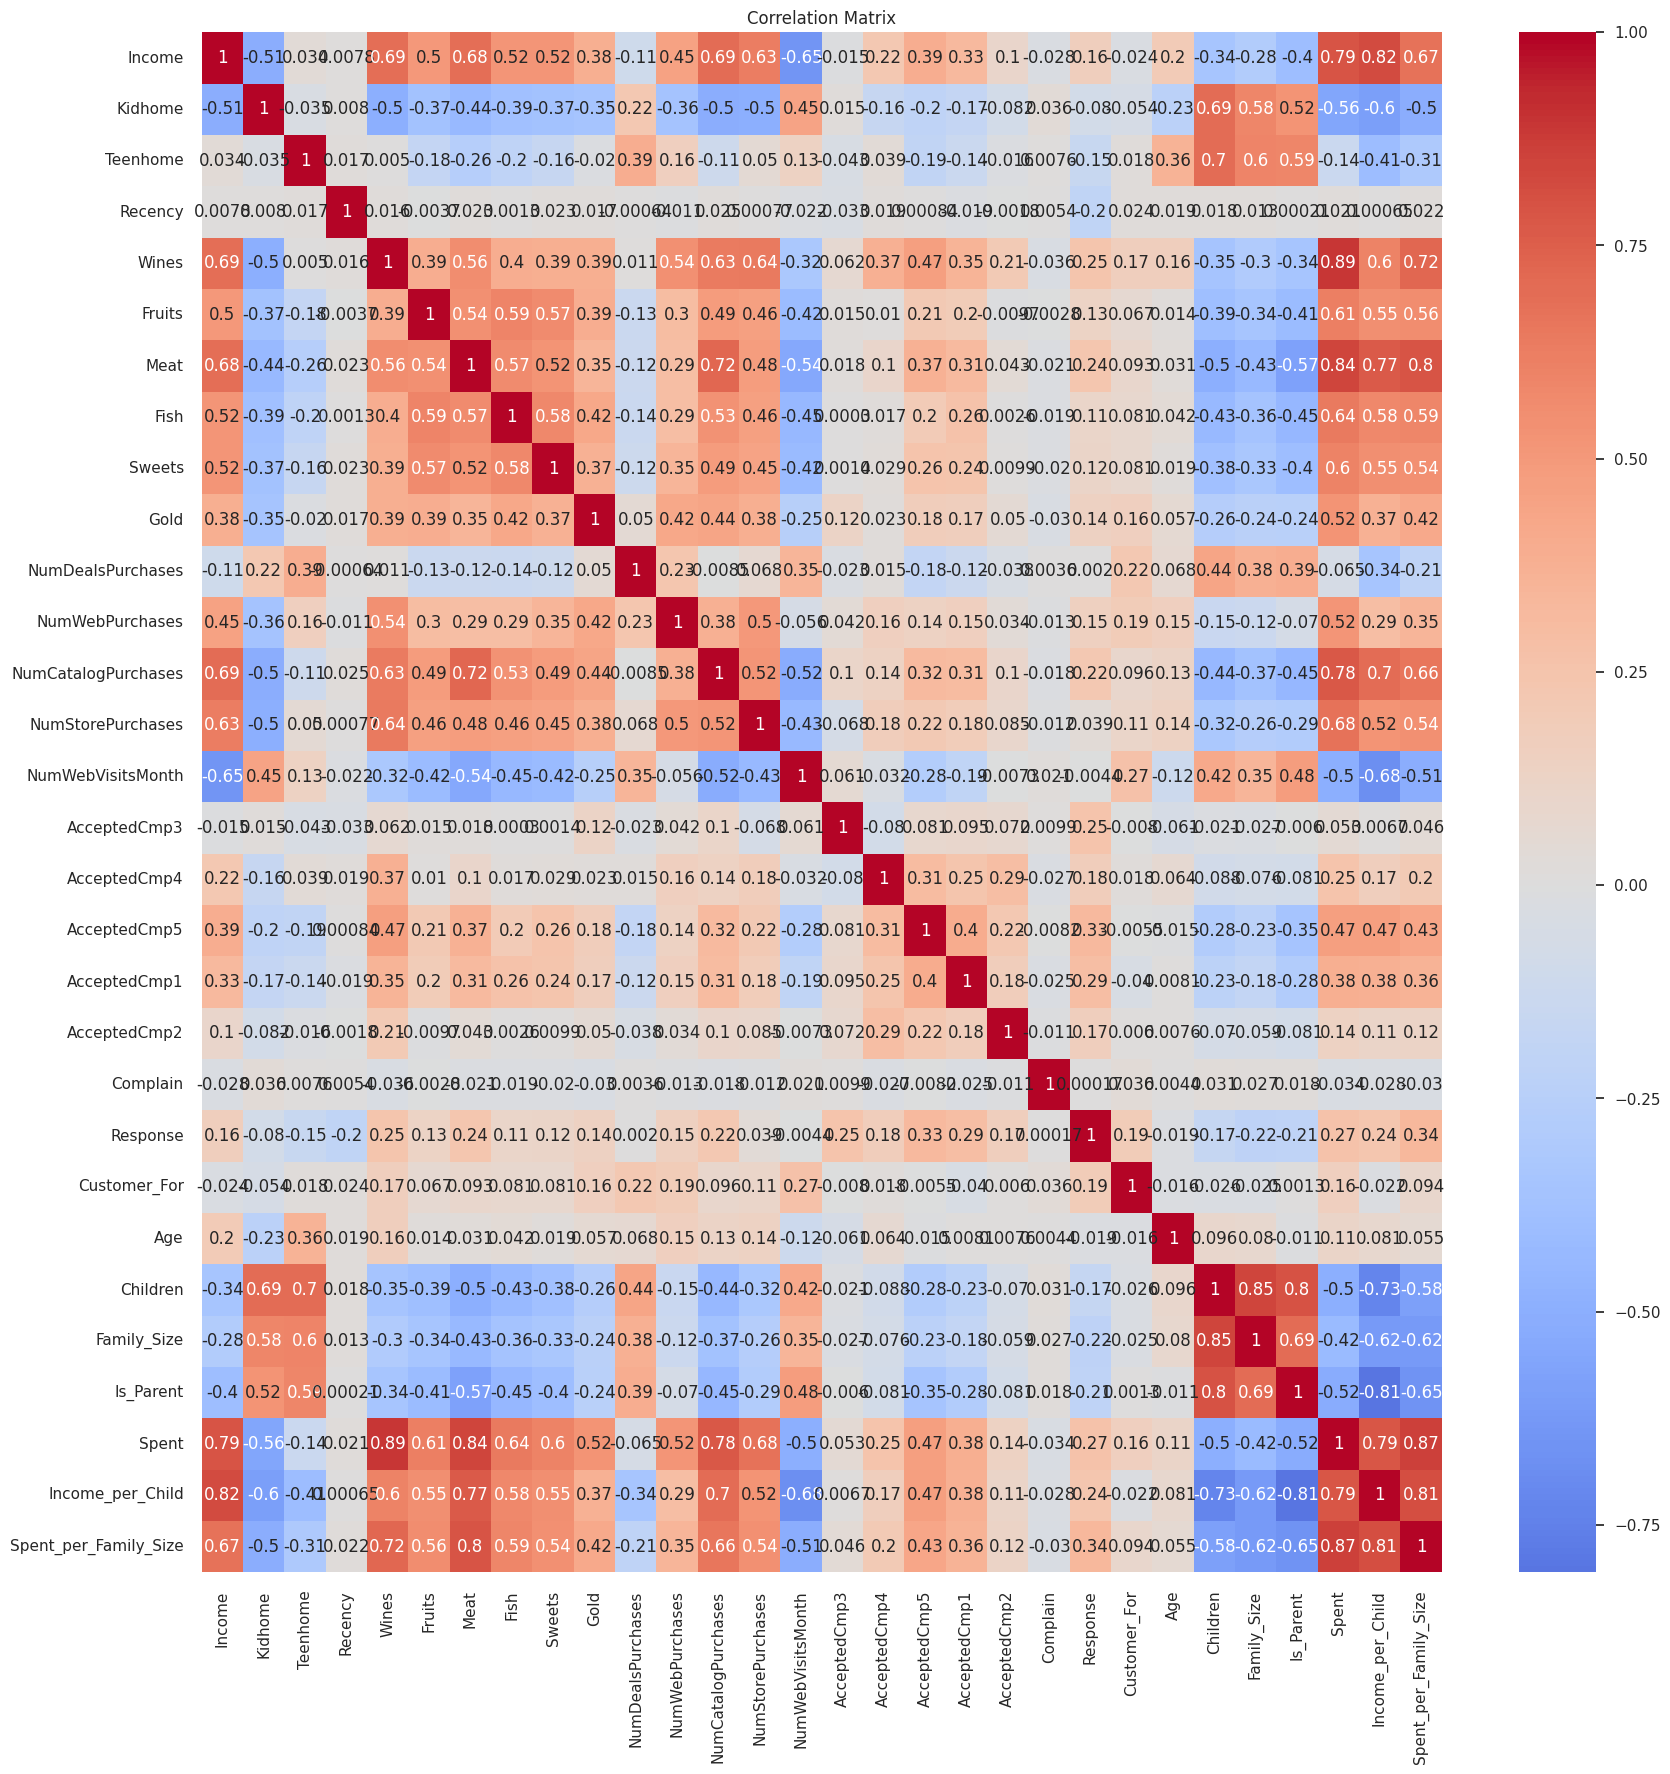

In [ ]:
def plot_correlation_matrix(data):
  numeric_data = data.select_dtypes(include=[np.number])
  corr_matrix = numeric_data.corr()
  plt.figure(figsize=(20,20))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.title("Correlation Matrix")
  plt.show()

plot_correlation_matrix(data)

# Data Preprocessing

## Encoding Categorical Variables

In [ ]:
def encode_categorical(data):
  categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
  print("Categorical variables to encode :", categorical_columns)

  data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
  print("Categorical variables encoded successfully.")
  return data

data = encode_categorical(data)

Categorical variables to encode : ['Education', 'Living_With']
Categorical variables encoded successfully.


## Scaling the features

In [ ]:
def scale_features(data):
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)
  scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
  print("Features scaled successfully.")
  return scaled_data

scaled_data = scale_features(data)

Features scaled successfully.


# Dimensionality Reduction

## PCA

PCA applied with 3 components.


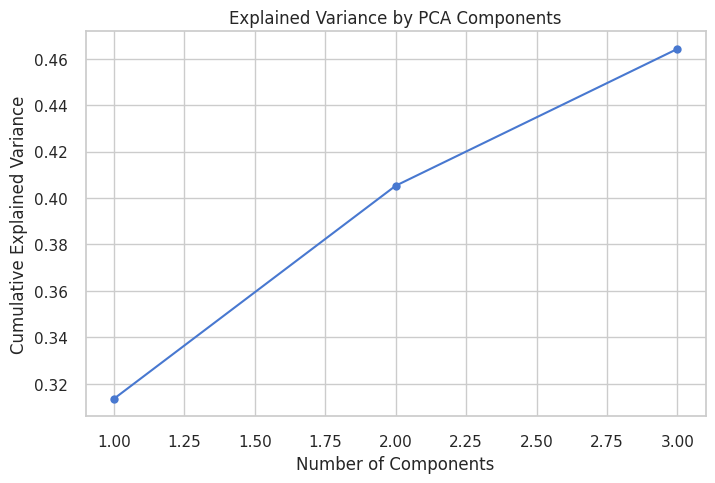

In [ ]:
def apply_pca(scaled_data, n_components=3):
  pca = PCA(n_components=n_components)
  pca_result = pca.fit_transform(scaled_data)
  pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
  print(f"PCA applied with {n_components} components.")

  explained_var = np.cumsum(pca.explained_variance_ratio_)
  plt.figure(figsize=(8,5))
  plt.plot(range(1,n_components+1), explained_var, marker='o')
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.title('Explained Variance by PCA Components')
  plt.grid(True)
  plt.show()

  return pca_df

pca_df = apply_pca(scaled_data, n_components=3)

## Visualization of PCA results

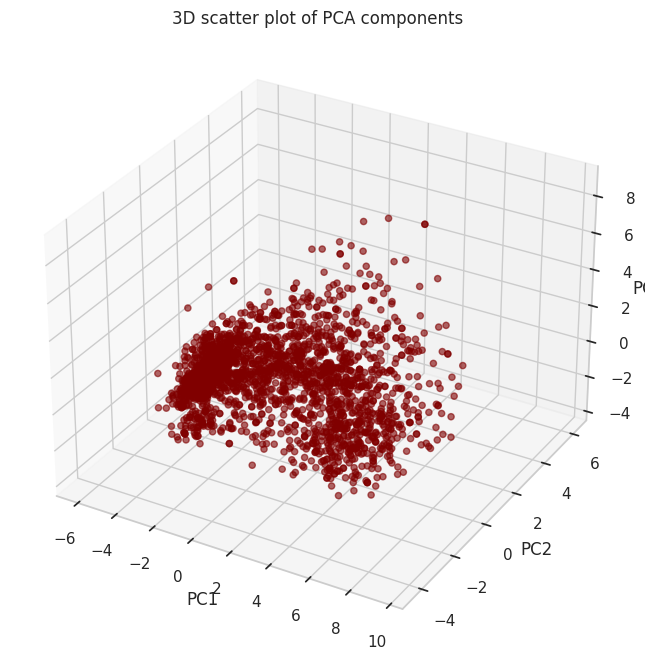

In [ ]:
def plot_pca_3d(pca_df):
  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(
      pca_df["PC1"],pca_df["PC2"],pca_df["PC3"],
      c='maroon',marker='o',alpha=0.6
  )
  ax.set_xlabel("PC1")
  ax.set_ylabel("PC2")
  ax.set_zlabel("PC3")
  ax.set_title("3D scatter plot of PCA components")
  plt.show()

plot_pca_3d(pca_df)

# Clustering

## Elbow Method

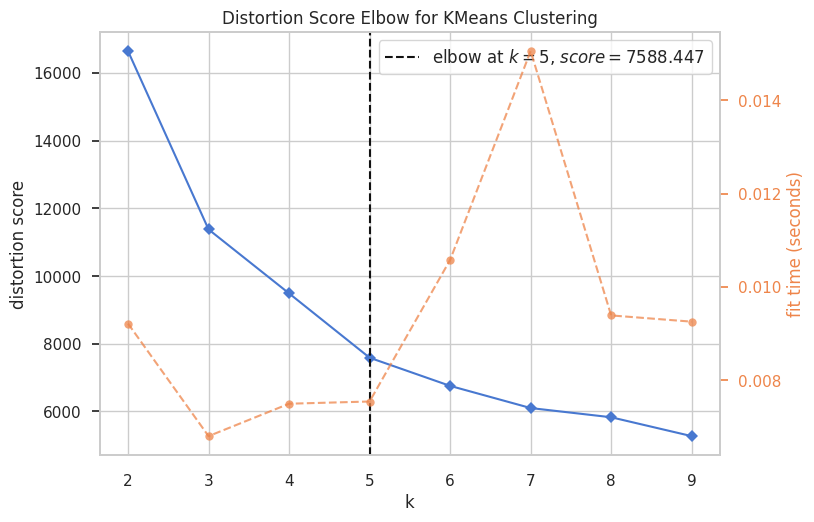

Optimal number of clusters based on Elbow Method: 5


In [ ]:
def elbow_method(data, max_clusters=10):
  model = KMeans(random_state=42)
  visualizer = KElbowVisualizer(model, k=(2,max_clusters))
  visualizer.fit(data)
  visualizer.show()
  optimal_clusters = visualizer.elbow_value_
  print(f"Optimal number of clusters based on Elbow Method: {optimal_clusters}")
  return optimal_clusters

optimal_clusters = elbow_method(pca_df)


## Agglomerative Clustering

In [ ]:
def agglomerative_clustering(data, n_clusters):
  agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
  clusters = agg_clust.fit_predict(data)
  print(f"Agglomerative clustering applied with {n_clusters} clusters.")
  return clusters

clusters = agglomerative_clustering(pca_df, optimal_clusters)
pca_df['Cluster'] = clusters
data['Cluster'] = clusters

Agglomerative clustering applied with 5 clusters.


# Evaluating Clustering

In [ ]:
def evaluating_clustering(data, clusters):
  score = silhouette_score(data, clusters)
  print(f"Silhouette Score: {score:.2f}")

evaluating_clustering(pca_df, clusters)

Silhouette Score: 0.44


# Enhanced Visualization

## 3D scatter plot with clusters

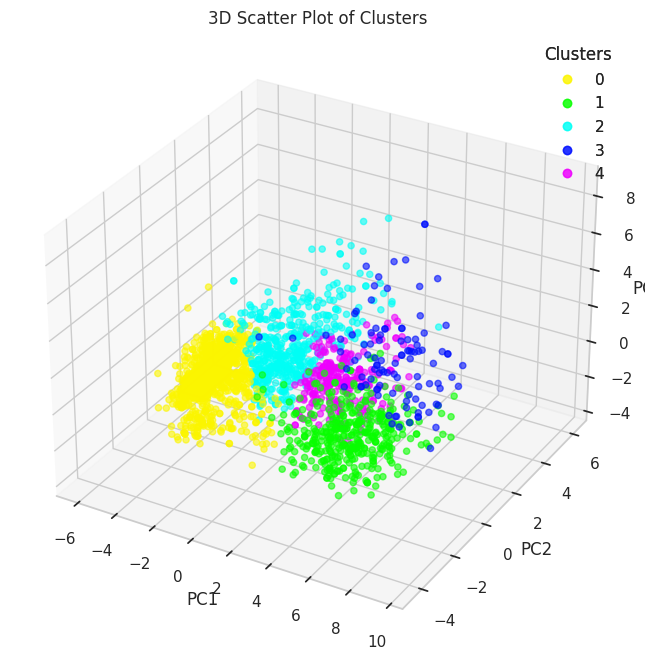

In [ ]:
def plot_clusters_3d(pca_df):
    cmap = ListedColormap(sns.color_palette("hsv", optimal_clusters))
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        pca_df["PC1"], pca_df["PC2"], pca_df["PC3"],
        c=pca_df["Cluster"], cmap=cmap, marker='o', alpha=0.6
    )
    ax.set_title("3D Scatter Plot of Clusters")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    legend1 = ax.legend(*scatter.legend_elements(),
                        title="Clusters")
    ax.add_artist(legend1)
    plt.show()

plot_clusters_3d(pca_df)

## Interactive Visualization with Plotly

In [ ]:
def interactive_plot(pca_df):

    fig = px.scatter_3d(
        pca_df,
        x='PC1',
        y='PC2',
        z='PC3',
        color='Cluster',
        title='Interactive 3D Scatter Plot of Clusters',
        opacity=0.7,
        size_max=5
    )
    fig.show()

interactive_plot(pca_df)

# Cluster Profiling

Cluster Summary Statistics:


Age           Income             Spent         Children  \
          mean median      mean   median     mean  median     mean   
Cluster                                                              
0        41.82   41.0  34010.59  33629.0    91.30    61.0     1.20   
1        46.78   48.0  73977.48  74587.5  1301.74  1282.0     0.02   
2        48.99   49.0  55030.66  54450.0   562.97   473.0     1.39   
3        42.14   39.0  80922.17  82583.0  1681.46  1750.0     0.02   
4        48.49   48.5  66658.47  66470.5  1072.44  1008.5     1.03   

        Family_Size Is_Parent Customer_For        Income_per_Child            \
               mean      mean         mean median             mean    median   
Cluster                                                                        
0              2.84      0.86       319.37  304.0         17185.33  15175.50   
1              1.62      0.02       347.86  345.0         73213.73  74280.50   
2              3.09      1.00       396.66  405.0         24135.29  23958.00   
3              1.54      0.02       373.12  403.0         80061.67  82332.50   
4              2.69      1.00       401.23  434.0         32974.51  32934.75   

        Spent_per_Family_Size           
                         mean   median  
Cluster                                 
0                       38.87    21.50  
1                      890.94   794.00  
2                      194.04   165.00  
3                     1227.58  1113.75  
4                      412.56   376.33

<ipython-input-25-def635aa124b>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




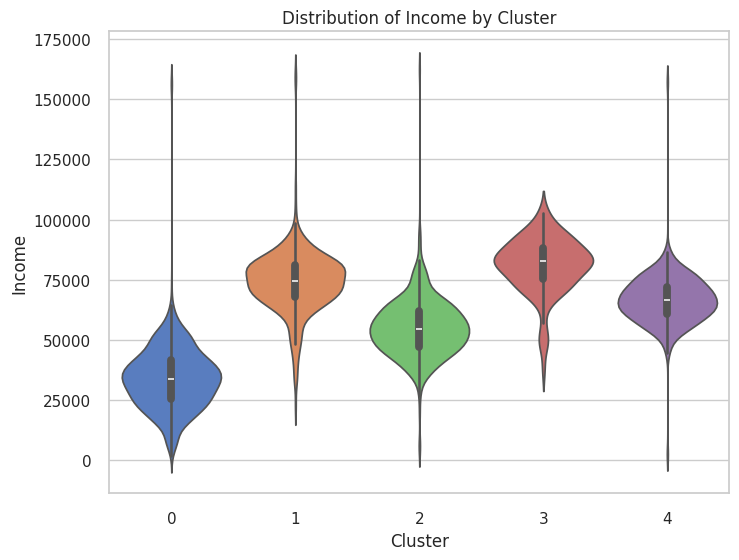

<ipython-input-25-def635aa124b>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




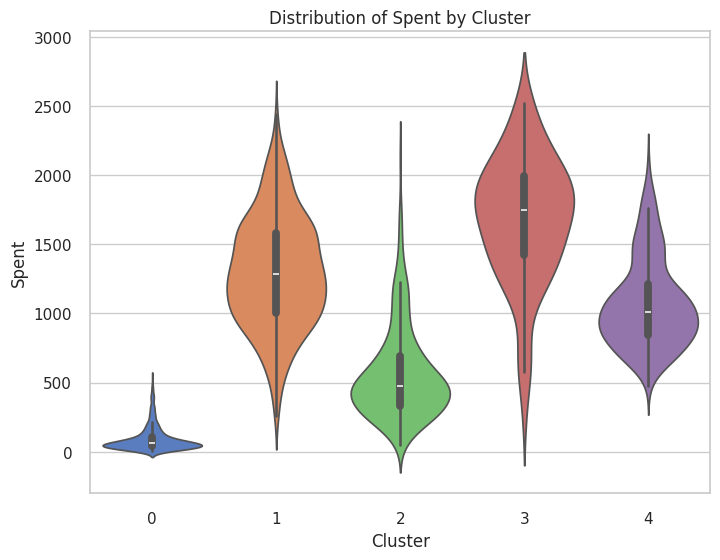

<ipython-input-25-def635aa124b>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




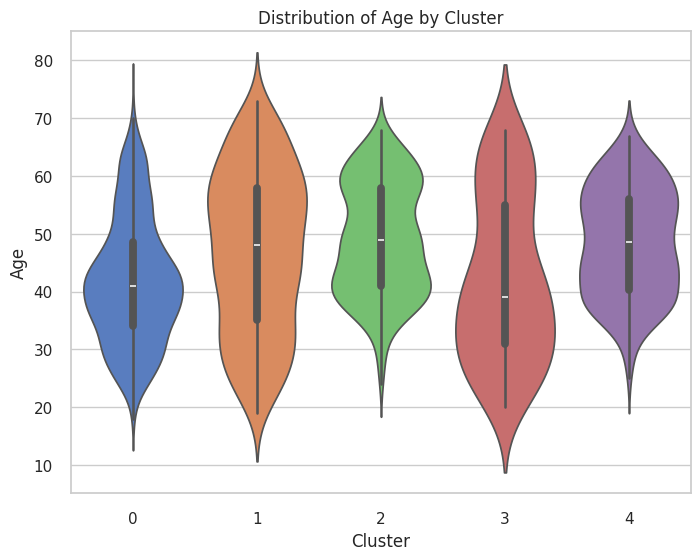

<ipython-input-25-def635aa124b>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




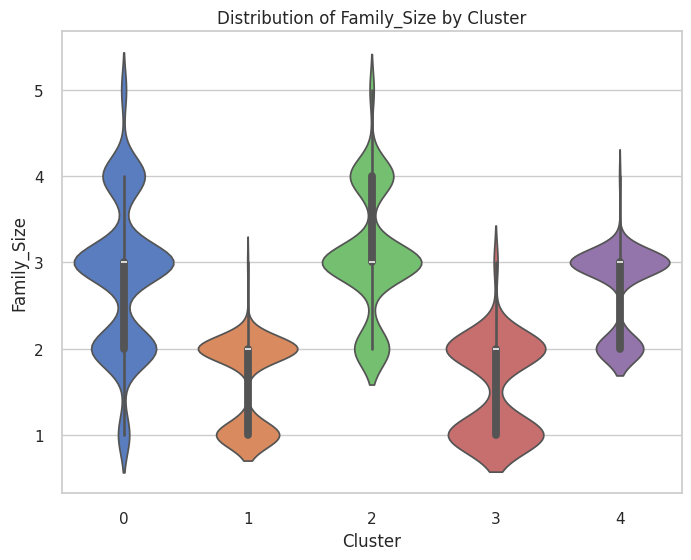

<ipython-input-25-def635aa124b>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




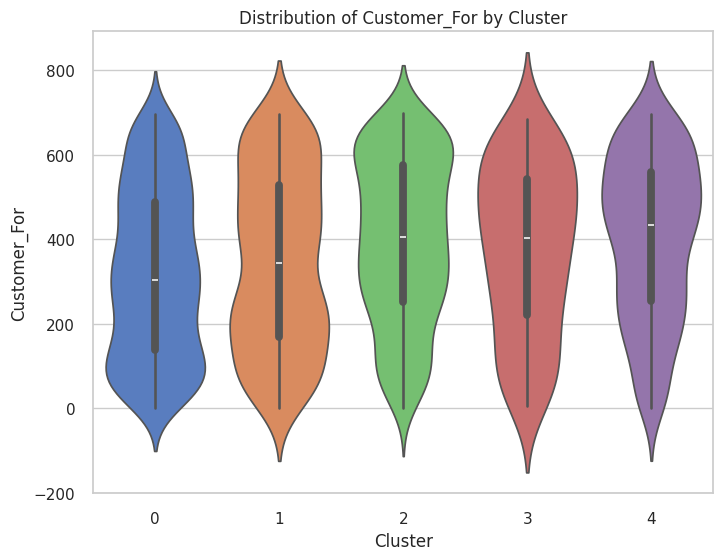

In [ ]:
def cluster_profiling(data):

    print("Cluster Summary Statistics:")
    cluster_summary = data.groupby('Cluster').agg({
        'Age': ['mean', 'median'],
        'Income': ['mean', 'median'],
        'Spent': ['mean', 'median'],
        'Children': 'mean',
        'Family_Size': 'mean',
        'Is_Parent': 'mean',
        'Customer_For': ['mean', 'median'],
        'Income_per_Child': ['mean', 'median'],
        'Spent_per_Family_Size': ['mean', 'median']
    }).round(2)
    display(cluster_summary)


    key_features = ['Income', 'Spent', 'Age', 'Family_Size', 'Customer_For']
    for feature in key_features:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x='Cluster', y=feature, data=data, palette="muted")
        plt.title(f'Distribution of {feature} by Cluster')
        plt.show()

cluster_profiling(data)


# Advanced Clustering Evaluation

## Comparing Multiple Clustering Algorithms

In [ ]:
def compare_clustering_algorithms(data, n_clusters):
    """Compare KMeans, Agglomerative Clustering, and DBSCAN."""
    from sklearn.cluster import DBSCAN

    algorithms = {
        'KMeans': KMeans(n_clusters=n_clusters, random_state=42),
        'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
    }

    for name, algorithm in algorithms.items():
        if name == 'DBSCAN':
            preds = algorithm.fit_predict(data)
        else:
            preds = algorithm.fit_predict(data)

        if len(set(preds)) > 1:
            score = silhouette_score(data, preds)
            print(f"{name} Silhouette Score: {score:.2f}")
        else:
            print(f"{name} could not form multiple clusters.")

compare_clustering_algorithms(pca_df.drop('Cluster', axis=1), optimal_clusters)


KMeans Silhouette Score: 0.36
Agglomerative Silhouette Score: 0.35
DBSCAN Silhouette Score: -0.36


## Cluster Stability Analysis

In [ ]:
def cluster_stability(scaled_data, n_clusters, n_runs=10):
    """Assess the stability of clusters over multiple runs."""
    scores = []
    for i in range(n_runs):
        pca = PCA(n_components=3, random_state=42+i)
        pca_result = pca.fit_transform(scaled_data)
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        preds = clusterer.fit_predict(pca_result)
        score = silhouette_score(pca_result, preds)
        scores.append(score)
    print(f"Average Silhouette Score over {n_runs} runs: {np.mean(scores):.2f}")

cluster_stability(scaled_data, optimal_clusters, n_runs=10)

Average Silhouette Score over 10 runs: 0.35


# Comprehensive Reporting

## Detailed Cluster Profiles

In [ ]:
# Detailed Cluster Profiles
def detailed_cluster_profiles(data):
    """Provide actionable insights based on cluster profiles."""
    cluster_profiles = data.groupby('Cluster').agg({
        'Age': 'mean',
        'Income': 'mean',
        'Spent': 'mean',
        'Children': 'mean',
        'Family_Size': 'mean',
        'Is_Parent': 'mean',
        'Customer_For': 'mean',
        'Income_per_Child': 'mean',
        'Spent_per_Family_Size': 'mean'
    }).round(2)

    print("Detailed Cluster Profiles:")
    display(cluster_profiles)

    # Actionable Insights
    for cluster in cluster_profiles.index:
        print(f"\n--- Cluster {cluster} ---")
        print(f"Average Age: {cluster_profiles.loc[cluster, 'Age']} years")
        print(f"Average Income: ${cluster_profiles.loc[cluster, 'Income']}")
        print(f"Average Spending: ${cluster_profiles.loc[cluster, 'Spent']}")
        print(f"Average Number of Children: {cluster_profiles.loc[cluster, 'Children']}")
        print(f"Average Family Size: {cluster_profiles.loc[cluster, 'Family_Size']}")
        print(f"Percentage of Parents: {cluster_profiles.loc[cluster, 'Is_Parent']}%")
        print(f"Average Customer Duration: {cluster_profiles.loc[cluster, 'Customer_For']} days")
        print(f"Average Income per Child: ${cluster_profiles.loc[cluster, 'Income_per_Child']}")
        print(f"Average Spending per Family Size: ${cluster_profiles.loc[cluster, 'Spent_per_Family_Size']}")

        # Example Actionable Insight
        if cluster_profiles.loc[cluster, 'Income'] > data['Income'].mean():
            print("Insight: High-income group. Focus on premium offerings and loyalty programs.")
        elif cluster_profiles.loc[cluster, 'Is_Parent'] > 0.5:
            print("Insight: Predominantly parents. Consider family-oriented marketing campaigns.")
        else:
            print("Insight: Diverse group. Tailor marketing strategies to individual preferences.")

detailed_cluster_profiles(data)


Detailed Cluster Profiles:


,Age,Income,Spent,Children,Family_Size,Is_Parent,Customer_For,Income_per_Child,Spent_per_Family_Size
Cluster,,,,,,,,,
0,41.82,34010.59,91.30,1.20,2.84,0.86,319.37,17185.33,38.87
1,46.78,73977.48,1301.74,0.02,1.62,0.02,347.86,73213.73,890.94
2,48.99,55030.66,562.97,1.39,3.09,1.00,396.66,24135.29,194.04
3,42.14,80922.17,1681.46,0.02,1.54,0.02,373.12,80061.67,1227.58
4,48.49,66658.47,1072.44,1.03,2.69,1.00,401.23,32974.51,412.56



--- Cluster 0 ---
Average Age: 41.82 years
Average Income: $34010.59
Average Spending: $91.3
Average Number of Children: 1.2
Average Family Size: 2.84
Percentage of Parents: 0.86%
Average Customer Duration: 319.37 days
Average Income per Child: $17185.33
Average Spending per Family Size: $38.87
Insight: Predominantly parents. Consider family-oriented marketing campaigns.

--- Cluster 1 ---
Average Age: 46.78 years
Average Income: $73977.48
Average Spending: $1301.74
Average Number of Children: 0.02
Average Family Size: 1.62
Percentage of Parents: 0.02%
Average Customer Duration: 347.86 days
Average Income per Child: $73213.73
Average Spending per Family Size: $890.94
Insight: High-income group. Focus on premium offerings and loyalty programs.

--- Cluster 2 ---
Average Age: 48.99 years
Average Income: $55030.66
Average Spending: $562.97
Average Number of Children: 1.39
Average Family Size: 3.09
Percentage of Parents: 1.0%
Average Customer Duration: 396.66 days
Average Income per Child